Import libraries

In [148]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
#from google.colab import drive

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv
import time


from sklearn.model_selection import KFold, StratifiedKFold
from os import listdir
from os.path import isfile, join

Configuration

In [149]:
image_size = (500, 500)
image_height, image_width = image_size
total_images = 643 * 4

Prepare image

In [150]:
def resize_and_pad_image(image_path,size=(900, 900)):
    # Open the image file
    img = Image.open(image_path)

    # Convert image to grayscale
    #img = img.convert("L")

    # Get the original dimensions
    original_width, original_height = img.size

    # Calculate the new dimensions preserving the aspect ratio
    aspect_ratio = original_width / original_height

    if aspect_ratio > 1:  # Width is greater than height
        new_width = image_size[0]
        new_height = int(image_size[0] / aspect_ratio)
    else:  # Height is greater than width or square
        new_height = image_size[1]
        new_width = int(image_size[1] * aspect_ratio)

    # Resize the image with the new dimensions
    img = img.resize((new_width, new_height))

    # Create a new image with the desired size and black (zero) padding
    new_img = Image.new("RGB", image_size, (0,0,0))

    # Paste the resized image onto the center of the new image
    new_img.paste(img, ((image_size[0] - new_width) // 2, (image_size[1] - new_height) // 2))

    # save the resized image
    #new_img.save("new_img.jpg")

    #return new_img
    img_array = np.array(new_img)
    flipped_image_array = np.flip(img_array, axis=1)
    
    #flipped_image = Image.fromarray(flipped_image_array)
    #flipped_image.show()  # This will display the flipped image

    return img_array.reshape(-1), flipped_image_array.reshape(-1)

# Example usage
#resize_and_pad_image("input_image.jpg", "output_image.jpg")

In [151]:
def preprocess_and_create_dataframe(input_dirs):

    df = pd.DataFrame()  # Initialize an empty DataFrame

    images = []  # List to store image data
    labels = []  # List to store class labels

    cntr = 0;
    for class_label, input_dir in enumerate(input_dirs):
        for filename in os.listdir(input_dir):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                input_path = os.path.join(input_dir, filename)
                img_array, flipped_img_array = resize_and_pad_image(input_path)
                print(f"processing image: {cntr} / {total_images}")
                #create a new row to append to the df
                #row_df = pd.DataFrame([img_array])
                #row_df['class'] = class_label
                # Append the row to the main DataFrame
                #df = pd.concat([df, row_df], ignore_index=True)
                images.append(img_array)
                labels.append(class_label)
                #TODO uncomment to add mirrored images
                images.append(flipped_img_array)
                labels.append(class_label)

                cntr += 1  #TODO change to 2 when mirror images added
    images_array = np.array(images)
    labels_array = np.array(labels)
    return images_array, labels_array

#Example usage
#input_dirs = ['other','ontoUML']
#df2 = preprocess_and_create_dataframe(input_dirs)
# Optionally, save the DataFrame to a CSV file
#df2.to_csv('/content/drive/My Drive/Onto_UML_Data/Dataset.csv', index=False)

Folder where dataset of images is

In [152]:
# Connect to google drive, where I have my dataset stored
#drive.mount('/content/drive',  force_remount=True)

# Directory where the folders containing the images of the differnt classes are stored
base_dir = 'Onto_UML_Data'

# List directories and files
print("Folders and files in directory:")
for folder_name in os.listdir(base_dir):
    print(folder_name)

Folders and files in directory:
ontoUML
ontoUML_test
other
other_no_class
other_test


Process images and store in numpy array

In [153]:
input_dirs = ['Onto_UML_Data/ontoUML', 'Onto_UML_Data/other']
X, y = preprocess_and_create_dataframe(input_dirs)

processing image: 0 / 2572
processing image: 1 / 2572
processing image: 2 / 2572
processing image: 3 / 2572
processing image: 4 / 2572
processing image: 5 / 2572
processing image: 6 / 2572
processing image: 7 / 2572
processing image: 8 / 2572
processing image: 9 / 2572
processing image: 10 / 2572
processing image: 11 / 2572
processing image: 12 / 2572
processing image: 13 / 2572
processing image: 14 / 2572
processing image: 15 / 2572
processing image: 16 / 2572
processing image: 17 / 2572
processing image: 18 / 2572
processing image: 19 / 2572
processing image: 20 / 2572
processing image: 21 / 2572
processing image: 22 / 2572
processing image: 23 / 2572
processing image: 24 / 2572
processing image: 25 / 2572
processing image: 26 / 2572
processing image: 27 / 2572
processing image: 28 / 2572
processing image: 29 / 2572
processing image: 30 / 2572
processing image: 31 / 2572
processing image: 32 / 2572
processing image: 33 / 2572
processing image: 34 / 2572
processing image: 35 / 2572
pr

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


processing image: 160 / 2572
processing image: 161 / 2572
processing image: 162 / 2572
processing image: 163 / 2572
processing image: 164 / 2572
processing image: 165 / 2572
processing image: 166 / 2572
processing image: 167 / 2572
processing image: 168 / 2572
processing image: 169 / 2572
processing image: 170 / 2572
processing image: 171 / 2572
processing image: 172 / 2572
processing image: 173 / 2572
processing image: 174 / 2572
processing image: 175 / 2572
processing image: 176 / 2572
processing image: 177 / 2572
processing image: 178 / 2572
processing image: 179 / 2572
processing image: 180 / 2572
processing image: 181 / 2572
processing image: 182 / 2572
processing image: 183 / 2572
processing image: 184 / 2572
processing image: 185 / 2572
processing image: 186 / 2572
processing image: 187 / 2572
processing image: 188 / 2572
processing image: 189 / 2572
processing image: 190 / 2572
processing image: 191 / 2572
processing image: 192 / 2572
processing image: 193 / 2572
processing ima

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (120399480 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


processing image: 495 / 2572
processing image: 496 / 2572
processing image: 497 / 2572
processing image: 498 / 2572
processing image: 499 / 2572
processing image: 500 / 2572
processing image: 501 / 2572
processing image: 502 / 2572
processing image: 503 / 2572
processing image: 504 / 2572
processing image: 505 / 2572
processing image: 506 / 2572
processing image: 507 / 2572
processing image: 508 / 2572
processing image: 509 / 2572
processing image: 510 / 2572
processing image: 511 / 2572
processing image: 512 / 2572
processing image: 513 / 2572
processing image: 514 / 2572
processing image: 515 / 2572
processing image: 516 / 2572
processing image: 517 / 2572
processing image: 518 / 2572
processing image: 519 / 2572
processing image: 520 / 2572
processing image: 521 / 2572
processing image: 522 / 2572
processing image: 523 / 2572
processing image: 524 / 2572
processing image: 525 / 2572
processing image: 526 / 2572
processing image: 527 / 2572
processing image: 528 / 2572
processing ima

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (135178164 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


processing image: 641 / 2572
processing image: 642 / 2572
processing image: 643 / 2572
processing image: 644 / 2572
processing image: 645 / 2572
processing image: 646 / 2572
processing image: 647 / 2572
processing image: 648 / 2572
processing image: 649 / 2572
processing image: 650 / 2572
processing image: 651 / 2572
processing image: 652 / 2572
processing image: 653 / 2572
processing image: 654 / 2572
processing image: 655 / 2572
processing image: 656 / 2572
processing image: 657 / 2572
processing image: 658 / 2572
processing image: 659 / 2572
processing image: 660 / 2572
processing image: 661 / 2572
processing image: 662 / 2572
processing image: 663 / 2572
processing image: 664 / 2572
processing image: 665 / 2572
processing image: 666 / 2572
processing image: 667 / 2572
processing image: 668 / 2572
processing image: 669 / 2572
processing image: 670 / 2572
processing image: 671 / 2572
processing image: 672 / 2572
processing image: 673 / 2572
processing image: 674 / 2572
processing ima

In [154]:
#df.to_csv('OntoUML_Dataset.csv', index=False)

In [155]:
import keras

from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from keras.models import Model
from keras.models import Sequential

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


from keras.optimizers import Adam
from keras.optimizers import SGD

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [156]:

# read dataset

#drive.mount('/content/drive',  force_remount=True)
#print("Downloading dataset")
#df = pd.read_csv('OntoUML_Dataset_500.csv')


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


# Step 1: Prepare the Data
# Assuming df contains your DataFrame with image data and labels



print("transforming dataset")
#X = np.array(df.drop(columns=['class']))  # Features (input)
X = X.reshape(-1, 500, 500, 3)  # Assuming grayscale images, use 3 instead of 1 for RGB images

#y = np.array(df['class'])                 # Labels (output)

# Step 2: Split the Data into Training and Validation Sets

# Step 2.1: Split the Data into Training and Test Sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2.2: Split the Training Set into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# Note: test_size=0.25 of 80% (remaining data) results in 20% validation data

# Step 3: Load the InceptionV3 Model
print("Creating model")
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(500, 500, 3))

# Step 4: Freeze Layers
for layer in base_model.layers[:175]:
    layer.trainable = False
for layer in base_model.layers[175:]:
    layer.trainable = True

# Step 5: Add Additional Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Add an output layer

# Step 6: Create the Model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Compile the Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#TODO add to callbacks
reduce_learning_rate = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-4
    )


print("training model")
# Step 8: Train the Model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),  callbacks=[early_stopping, reduce_learning_rate])

# Step 9: Evaluate the Model (optional)
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Accuracy:", accuracy)

# Save the model in the TensorFlow SavedModel format
model.save('my_model_clean_mirroring')




transforming dataset
Creating model
training model
Epoch 1/10
52/52 [==============================] - 390s 7s/step - loss: 0.5047 - accuracy: 0.7732 - val_loss: 4.9797 - val_accuracy: 0.7293 - lr: 0.0010
Epoch 2/10
52/52 [==============================] - 383s 7s/step - loss: 0.4005 - accuracy: 0.8185 - val_loss: 70.5933 - val_accuracy: 0.5122 - lr: 0.0010
Epoch 3/10
52/52 [==============================] - 386s 7s/step - loss: 0.3506 - accuracy: 0.8533 - val_loss: 0.4655 - val_accuracy: 0.7683 - lr: 0.0010
Epoch 4/10
52/52 [==============================] - 383s 7s/step - loss: 0.2768 - accuracy: 0.8814 - val_loss: 5.6762 - val_accuracy: 0.5780 - lr: 0.0010
Epoch 5/10
52/52 [==============================] - 383s 7s/step - loss: 0.2949 - accuracy: 0.8845 - val_loss: 0.6912 - val_accuracy: 0.7439 - lr: 0.0010
Epoch 6/10
52/52 [==============================] - ETA: 0s - loss: 0.3081 - accuracy: 0.8710
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
52/52 [

INFO:tensorflow:Assets written to: my_model_clean_mirroring\assets


In [160]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

16/16 [==============================] - 72s 5s/step - loss: 0.4439 - accuracy: 0.8105
Test Loss: 0.44386211037635803
Test Accuracy: 0.810546875


16/16 [==============================] - 73s 5s/step
Confusion Matrix:
[[196  71]
 [ 26 219]]


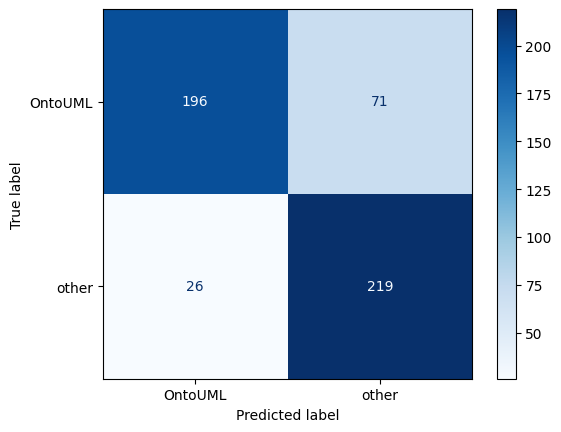

In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Predict the labels for the test set
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.zeros(len(y_pred_prob))
for i, _ in enumerate(range(len(y_pred_prob))): 
    if y_pred_prob[i][0] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0



# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

labels = ["OntoUML", "other"]

# Optional: Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [178]:
for i, _ in enumerate(range(len(y_pred))): 
    print(y_test[i])
    if not y_pred[i] == y_test[i]:
        image_array = X_test[i].reshape((500, 500, 3))
        image = Image.fromarray(image_array)
        if y_test[i] == 0:
            #falsly detected as other
            image.save(f"wrong_classifications/wrong_other/img{i}.png")
        else:
            #falsly detected as OntoUML
            image.save(f"wrong_classifications/wrong_ontouml/img{i}.png")
            



1
0
1
0
0
1
1
0
0
0
1
1
0
1
1
1
0
0
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
1
1
0
0
1
1
0
1
1
0
1
0
1
1
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
1
0
0
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
1
0
0
1
0
1
1
1
0
1
0
1
1
1
1
0
0
0
0
1
1
0
0
1
0
1
1
1
0
0
0
0
1
1
0
1
0
0
1
1
1
1
0
1
1
1
1
1
1
1
0
0
0
1
0
1
1
0
0
0
1
1
0
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
1
0
0
0
1
1
1
0
1
0
0
1
0
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
1
1
0
1
0
0
1
1
1
1
1
0
0
1
1
0
1
0
0
0
1
0
1
0
1
0
1
1
0
1
0
1
0
0
1
1
1
1
0
0
1
0
1
1
1
0
1
1
1
0
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
1
1
1
1
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
1
1
0
1
0
1
0
1
0
1
1
0
1
1
0
0
0
1
1
1
1
1
0
0
1
0
1
0
1
0
0
1
1
0
0
1
1
0
1
0
1
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
1
1
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
1
0
1
0
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1


In [158]:
print(f"train: {X_train.shape[0]} elements")
print(f"val: {X_val.shape[0]} elements")
print(f"test: {X_test.shape[0]} elements")


train: 1636 elements
val: 410 elements
test: 512 elements
